# 1. Introduction
# Time Series - SARIMA

This is the extension of ARIMA model to deal with seasonal data. It divides the data into seasonal and non-seasonal components and models them in a similar fashion. It is characterized by 7 parameters, for non-seasonal part (p,d,q) parameters same as for ARIMA model and for seasonal part (P,D,Q,m) parameters where ‘m’ is the number of seasonal periods and P,D,Q are similar to parameters of ARIMA model. These parameters can be calibrated using grid search or genetic algorithm. A SARIMA model can be used to develop AR, MA, ARMA and ARIMA models.

`The method is suitable for univariate time series with trend and/or seasonal components.`


# 2 Import the required package

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
plt.rcParams["axes.grid"]=True
from statsmodels.graphics.tsaplots  import plot_acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX


# 3. import the time series data
In this project, I will be using the us_retail dataset(Clothing column). The dataset consist of monthly records of sale across various retails sales in us, the data was download from kaggle site 

In [5]:
path="C:/Users/pc/Desktop/1/Data Science/Deep Learning/Time Series/comp/"
df = pd.read_csv(path + "us_retail_sales.csv")
df.head()

,Month,Clothing,Appliances,FoodAndBeverage,Automobiles,GeneralMerchandise,BuildingMaterials
0,1992-01,6938,3657,29589,26788,14996,8964
1,1992-02,7524,3490,28570,28203,16015,9023
2,1992-03,8475,3669,29682,31684,17984,10608
3,1992-04,9401,3527,30228,32547,18872,11630
4,1992-05,9558,3571,31677,32883,20037,12327


In [6]:
# extract the neede columns
df_Automobiles= df[[ "Month","Automobiles"]]
df_Automobiles.head()

,Month,Automobiles
0,1992-01,26788
1,1992-02,28203
2,1992-03,31684
3,1992-04,32547
4,1992-05,32883


In [7]:
# check the summary of the data
df_Automobiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        336 non-null    object
 1   Automobiles  336 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


the month column is of object data type. First i will convert it to datetime and make it as index of the dataframe

In [8]:
df_Automobiles["Month"]= pd.to_datetime(df_Automobiles["Month"], format="%Y-%m")

<ipython-input-8-3b443c5d36f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Automobiles["Month"]= pd.to_datetime(df_Automobiles["Month"], format="%Y-%m")


In [9]:
df_Automobiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        336 non-null    datetime64[ns]
 1   Automobiles  336 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.4 KB


In [10]:
# set the month column as index
df_Automobiles.set_index("Month", inplace=True)

# 4. Time Series Analysis

# 4.1 Missing values

In [11]:
# check for missing values
df_Automobiles.isna().sum()

Automobiles    0
dtype: int64

# 4.2 Plot the time series dat

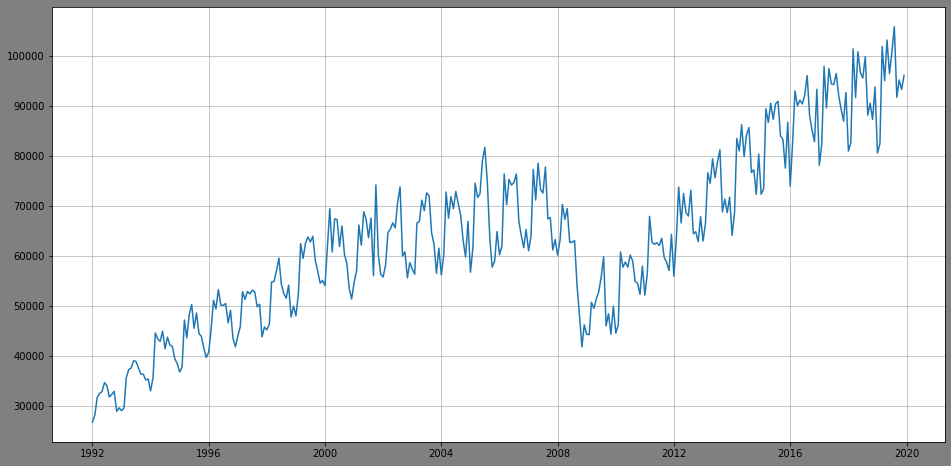

In [12]:
fig, ax = plt.subplots(figsize=(16, 8), facecolor=("grey"))
ax.grid(True, alpha=.9)
ax.plot(df_Automobiles)

# 4.3  Time Series Decomposition
 

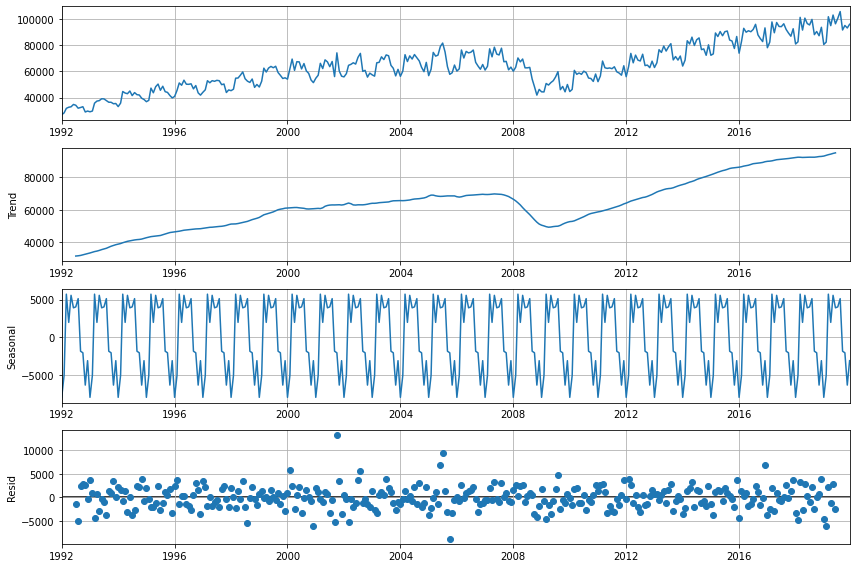

In [13]:
# additive decomposition
plt.rcParams["figure.figsize"]= (12,8)
from statsmodels.tsa.seasonal import seasonal_decompose
add_decompose = seasonal_decompose(df_Automobiles, model="add")
fig= add_decompose.plot()
plt.show()

# 4.4 plot the trend the dataset

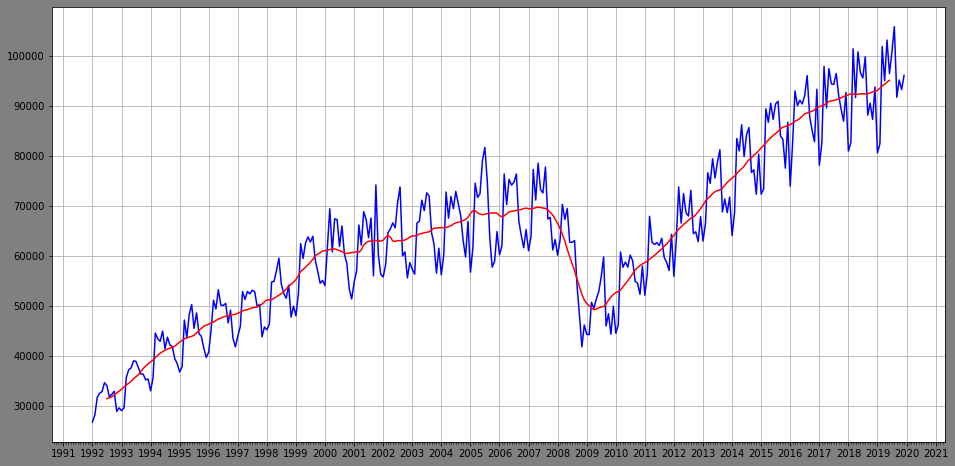

In [14]:
# plt.rcParams['figure.figsize']= (16, 8)

from matplotlib import dates as date
fig, ax = plt.subplots(figsize=(16,8), facecolor=("grey"))
ax.grid(True)


year= date.YearLocator(month=1)
month = date.MonthLocator()
yearformat = date.DateFormatter("%Y")
monthformat = date.DateFormatter("%m")

ax.xaxis.set_minor_locator(month)
ax.xaxis.grid(True)
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(yearformat)



plt.plot(df_Automobiles.index, df_Automobiles.values, c="blue")
plt.plot(add_decompose.trend.index, add_decompose.trend, c="red")

# 4.5 Plot the seasonal plot of the time series data

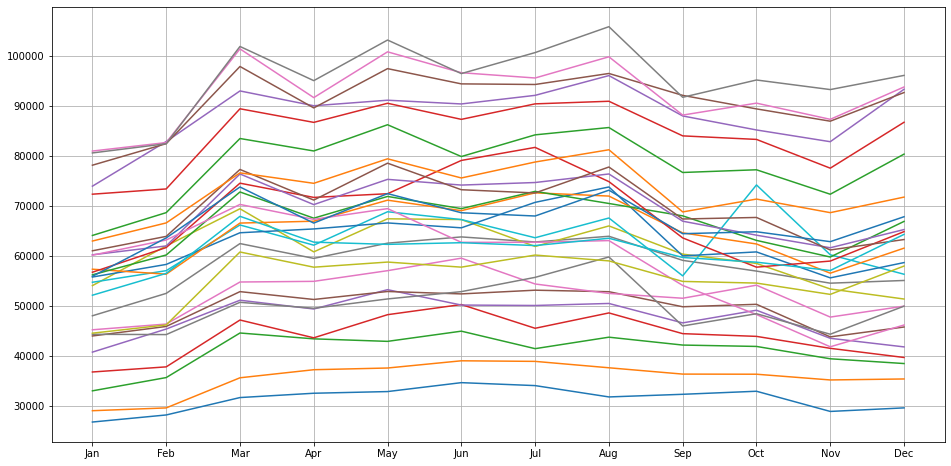

In [15]:
plt.figure(figsize=(16, 8))
plt.grid(True)
# Prepare data

df_seaoanl=df_Automobiles.copy()
df_seaoanl['year'] = [d.year for d in df_seaoanl.index.date]
df_seaoanl['month'] = [d.strftime('%b') for d in df_seaoanl.index.date]
years = df_seaoanl['year'].unique()
#fig, ax = plt.subplots(figsize=(16,8), facecolor=("grey"))
#ax.facecolor=("grey")

# make the plot
for i, n in enumerate(years):
    if i>=0:
        plt.plot("month","Automobiles" ,data=df_seaoanl[df_seaoanl["year"]==n])


The plot above show the seasonality of the dataset. And it can be seen from the plot that there is always increase of sale Clothing from nov to dec 

# 4.6. How to test for stationarity?


In [16]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(df_Automobiles, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')



ADF Statistic: -1.0985924133816318
p-value: 0.7156329078852922
Critial Values:
   1%, -3.451082300831733
Critial Values:
   5%, -2.87067210822307
Critial Values:
   10%, -2.5716355136268345


the the p values is greater than 0.05 which implies that there is not stationarity in the dataset. Also since the auto regression model work well on the data without seasonality and trend, I will detrend Moving Average the dataset

In [17]:
#rolling_mean = data.rolling(window = 12).mean()
#data['rolling_mean_diff'] = rolling_mean - rolling_mean.shift()
#ax1 = plt.subplot()
#data['rolling_mean_diff'].plot(title='after rolling mean & differencing');
#ax2 = plt.subplot()
#data.plot(title='original');


<AxesSubplot:xlabel='Month'>

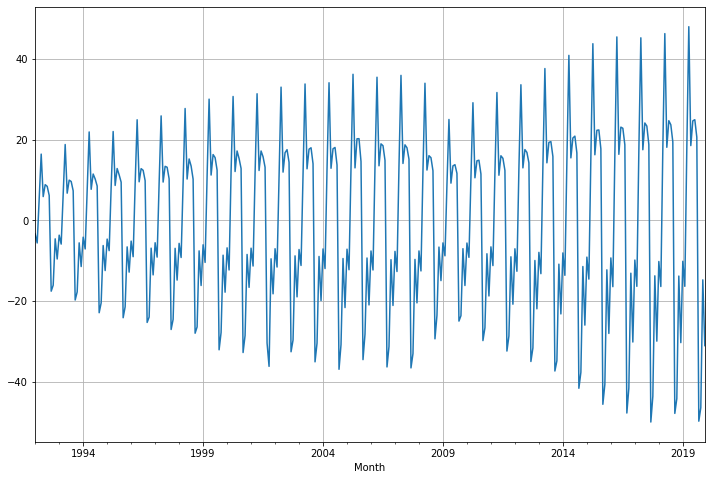

In [18]:
df_seasonal = df_Automobiles["Automobiles"] /  add_decompose.seasonal
#df_seasonal= df_detrend /  add_decompose.seasonal
#df_seasonal= df_seasonal.dropna()

#a=df_seasonal - df_seasonal.shift()
#df_stationary=a.dropna()
#df_stationary.plot()
df_seasonal.plot()


In [19]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(df_seasonal, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')



ADF Statistic: -2.236982077442863
p-value: 0.1930978464543054
Critial Values:
   1%, -3.451082300831733
Critial Values:
   5%, -2.87067210822307
Critial Values:
   10%, -2.5716355136268345


In [20]:
df_stationary=df_stationary.to_frame(name="Automobiles")

NameError: name 'df_stationary' is not defined

In [21]:
df_seasonal=df_seasonal.to_frame(name="Automobiles")

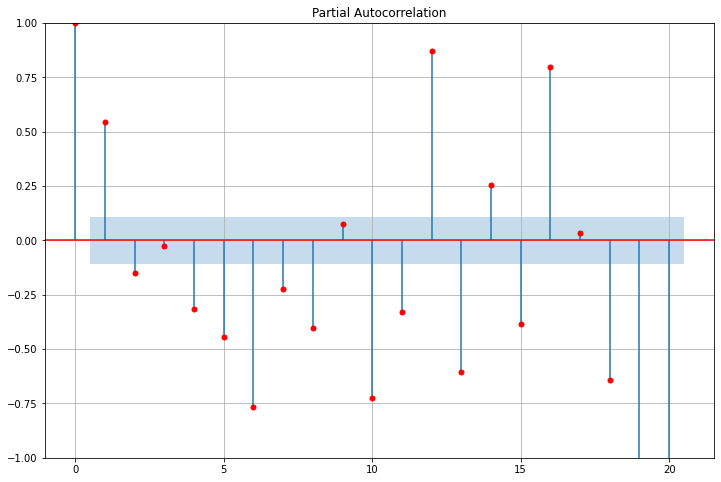

In [22]:
fig=plot_pacf(df_seasonal, lags=20, color="red",  method ='yw')

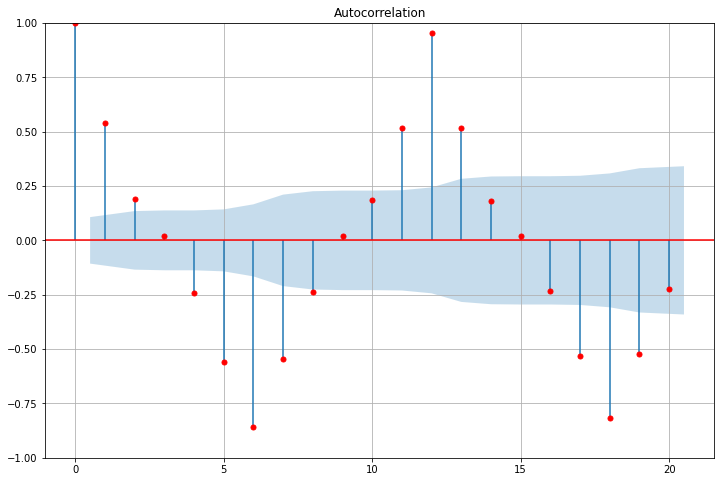

In [23]:
fig=plot_acf(df_seasonal, lags=20, color="red")

# 4.7 Carry granger Test

Granger Test is ues to check the forecasbility of the Time Serie

In [24]:
from statsmodels.tsa.stattools import grangercausalitytests
dd=df_Automobiles.reset_index()
dd["record_period"]= pd.to_datetime(dd.Month).dt.month
grangercausalitytests(dd[["Automobiles", 'record_period']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=63.2967 , p=0.0000  , df_denom=332, df_num=1
ssr based chi2 test:   chi2=63.8687 , p=0.0000  , df=1
likelihood ratio test: chi2=58.4580 , p=0.0000  , df=1
parameter F test:         F=63.2967 , p=0.0000  , df_denom=332, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=67.3332 , p=0.0000  , df_denom=329, df_num=2
ssr based chi2 test:   chi2=136.7129, p=0.0000  , df=2
likelihood ratio test: chi2=114.5979, p=0.0000  , df=2
parameter F test:         F=67.3332 , p=0.0000  , df_denom=329, df_num=2


{1: ({'ssr_ftest': (63.29669287277516, 2.8308460401733845e-14, 332.0, 1),
   'ssr_chi2test': (63.86865094090265, 1.3299725322090323e-15, 1),
   'lrtest': (58.458047802447254, 2.07672359275867e-14, 1),
   'params_ftest': (63.29669287277488, 2.830846040173762e-14, 332.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (67.33316646329783, 3.0754604959973493e-25, 329.0, 2),
   'ssr_chi2test': (136.71293373095122, 2.0566653814490276e-30, 2),
   'lrtest': (114.59788252354247, 1.3043255184693272e-25, 2),
   'params_ftest': (67.33316646329753, 3.075460495998062e-25, 329.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

# 5 Built the model

# 5.1 Method 1 : Moving Average

<AxesSubplot:xlabel='Month'>

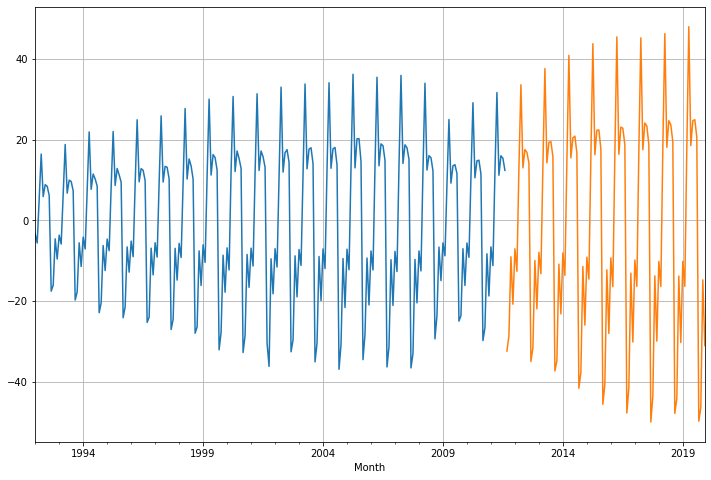

In [26]:
split = len(df_seasonal) - int(len(df_seasonal) * .3)

train = df_seasonal[["Automobiles"]][:split].rename(columns={"Automobiles": "Automobiles_train"})
test = df_seasonal[["Automobiles"]][split:].rename(columns={"Automobiles": "Automobiles_test"})
train.Automobiles_train.plot()
test.Automobiles_test.plot()

C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='Month'>

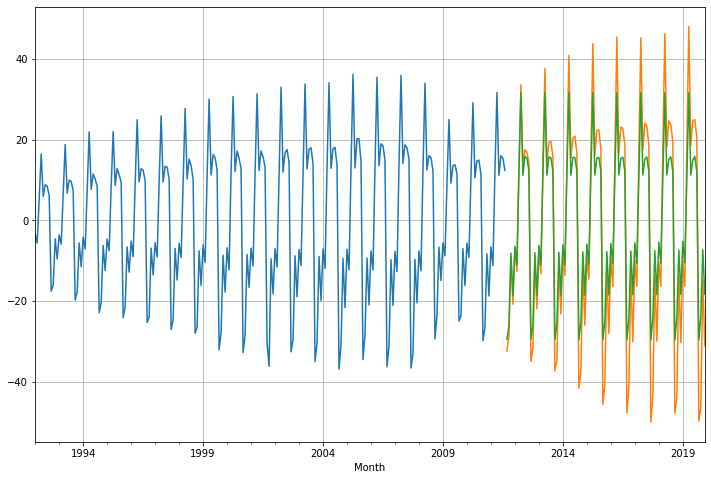

In [37]:
# SARIMA example
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random
# fit model
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 2, 1, 6))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(start=pd.to_datetime(test.index[0]),end=pd.to_datetime(test.index[-1]), dynamic=False)



yhat=yhat.to_frame(name="predicted_mean")
train.Automobiles_train.plot()
test.Automobiles_test.plot()
yhat.predicted_mean.plot()



# 6 Evaluate the method 1

In [38]:
naive_prediction_rmse = np.sqrt(mean_squared_error(test,yhat ))
naive_prediction_r2 = r2_score(test,yhat )

In [39]:
result= pd.DataFrame([{"Method": "Moving Average", "RMSE":naive_prediction_rmse, "r2":naive_prediction_r2}])
result

,Method,RMSE,r2
0,Moving Average,8.897104,0.887036


# Reference

1. kaggle.com
2. tutorialpoint.com